In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import statistics
import math
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import api_key

#import packages from alpha_vantage
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies


In [59]:
from api_keys import api_key
print(api_key)

CRMBXX4X1NUP1GAN


In [88]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

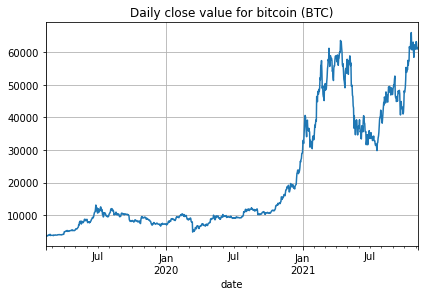

In [99]:
ccb = CryptoCurrencies(key=api_key, output_format='pandas')
b_data, b_meta_data = ccb.get_digital_currency_daily(symbol='BTC', market='USD')
b_data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

In [143]:
b_data.head()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-11-06,60940.18,60940.18,61560.49,61560.49,60050.00,60050.00,61360.20,61360.20,25343.51125,25343.51125
2021-11-05,61395.01,61395.01,62595.72,62595.72,60721.00,60721.00,60937.12,60937.12,31604.48749,31604.48749
2021-11-04,62896.49,62896.49,63086.31,63086.31,60677.01,60677.01,61395.01,61395.01,35930.93314,35930.93314
2021-11-03,63220.57,63220.57,63500.00,63500.00,60382.76,60382.76,62896.48,62896.48,43336.09049,43336.09049
2021-11-02,60911.12,60911.12,64270.00,64270.00,60624.68,60624.68,63219.99,63219.99,46368.28410,46368.28410


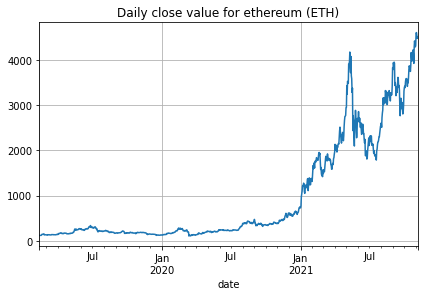

In [100]:
cce = CryptoCurrencies(key=api_key, output_format='pandas')
e_data, e_meta_data = cce.get_digital_currency_daily(symbol='ETH', market='USD')
e_data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for ethereum (ETH)')
plt.grid()
plt.show()

In [106]:
b_data.head(1)

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-11-06,60940.18,60940.18,61560.49,61560.49,60050.0,60050.0,61360.2,61360.2,25343.51125,25343.51125


In [108]:
e_data.head(1)

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-11-06,4474.24,4474.24,4530.0,4530.0,4326.17,4326.17,4502.3,4502.3,319613.2341,319613.2341


In [109]:
b_data.tail(1)

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2019-02-11,3679.75,3679.75,3684.9,3684.9,3615.53,3615.53,3631.05,3631.05,24954.614571,24954.614571


In [110]:
e_data.tail(1)

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2019-02-11,125.12,125.12,125.28,125.28,119.24,119.24,120.89,120.89,389405.30404,389405.30404


In [131]:
b_close = b_data.drop(columns = ['1a. open (USD)', '1b. open (USD)', '2a. high (USD)', '2b. high (USD)',
       '3a. low (USD)', '3b. low (USD)', '4a. close (USD)',
       '5. volume', '6. market cap (USD)'])
e_close = e_data.drop(columns = ['1a. open (USD)', '1b. open (USD)', '2a. high (USD)', '2b. high (USD)',
       '3a. low (USD)', '3b. low (USD)', '4a. close (USD)',
       '5. volume', '6. market cap (USD)'])

In [138]:
b_close = b_close.rename(columns = {'4b. close (USD)' : 'BTC (USD)'})

In [139]:
e_close = e_close.rename(columns = {'4b. close (USD)' : 'ETH (USD)'})

In [134]:
crypto_data = pd.concat([b_close, e_close], axis = 1)

In [116]:
crypto_data.head(1)

,BTC (USD),ETH (USD)
date,,
2021-11-06,61360.2,4502.3


In [117]:
crypto_data.tail(1)

,BTC (USD),ETH (USD)
date,,
2019-02-11,3631.05,120.89


In [118]:
crypto_data.corr()

,BTC (USD),ETH (USD)
BTC (USD),1.000000,0.921055
ETH (USD),0.921055,1.000000


Text(0, 0.5, '45 day rolling correlation between BTC and ETH prices')

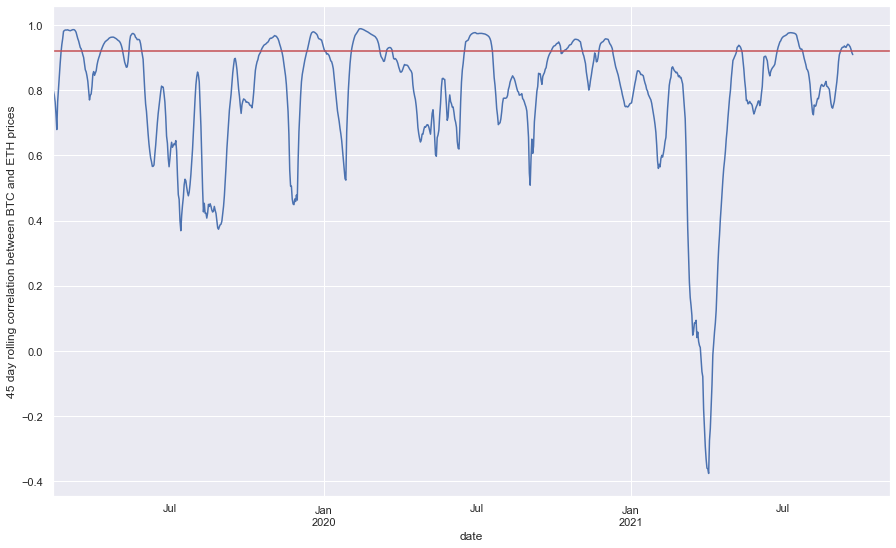

In [174]:
ax = crypto_data['BTC (USD)'].rolling(window = 45).corr(crypto_data['ETH (USD)']).plot(figsize = (15, 9))
ax.axhline(crypto_data.corr().iloc[0,1], c = 'r')
ax.set_ylabel('45 day rolling correlation between BTC and ETH prices')

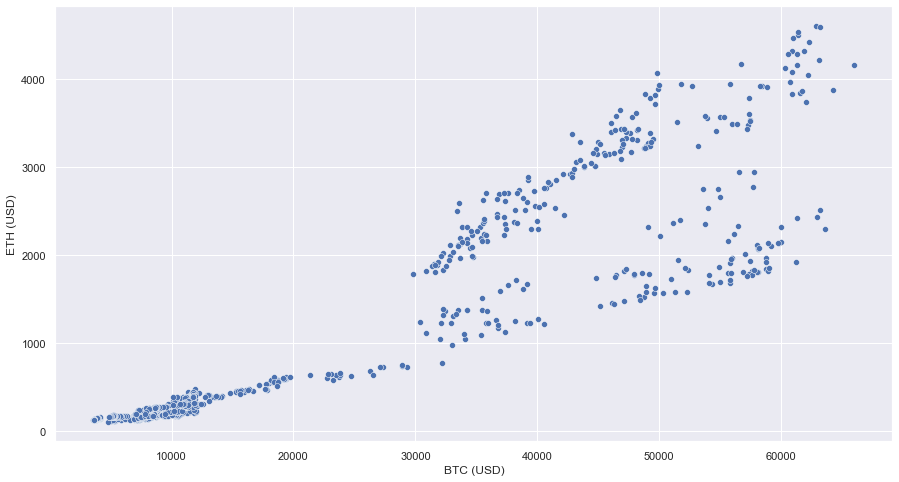

In [179]:
import seaborn as sns
sns.scatterplot(x="BTC (USD)", y="ETH (USD)", data=crypto_data);

<Figure size 360x288 with 0 Axes>

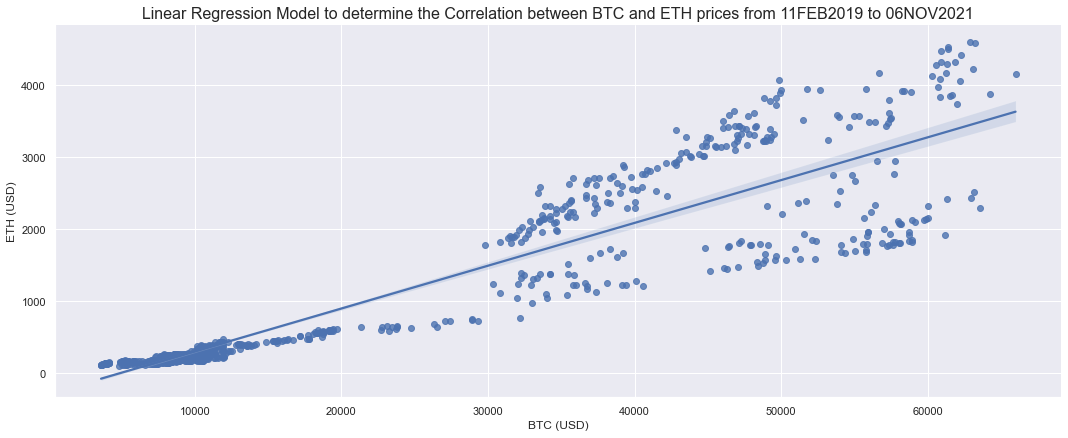

In [204]:
import seaborn as sns
plt.figure(figsize=(5, 4))
sns.lmplot(x="BTC (USD)", y="ETH (USD)", data=crypto_data, height=6, aspect=2.5)
plt.title("Linear Regression Model to determine the Correlation between BTC and ETH prices from 11FEB2019 to 06NOV2021", fontsize=16);